In [1]:
import numpy as np

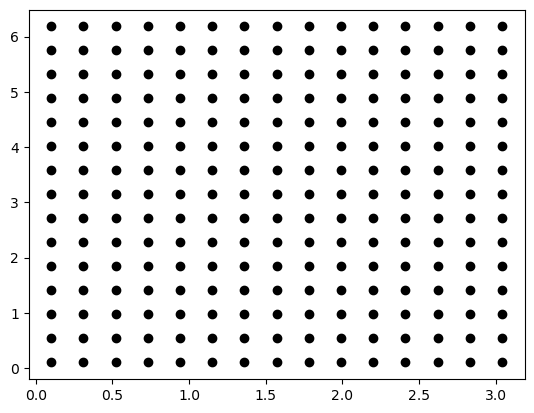

theta, phi 0.1 0.1
x, y,z :  [0.09933467 0.00996671 0.99500417]
theta, phi 0.1 0.5345132362271133
x, y,z :  [0.08590832 0.05085736 0.99500417]
theta, phi 0.1 0.9690264724542267
x, y,z :  [0.05651593 0.08229618 0.99500417]
theta, phi 0.1 1.4035397086813401
x, y,z :  [0.01662006 0.09844026 0.99500417]
theta, phi 0.1 1.8380529449084535
x, y,z :  [-0.02636465  0.09628923  0.99500417]
theta, phi 0.1 2.272566181135567
x, y,z :  [-0.06444949  0.07624286  0.99500417]
theta, phi 0.1 2.70707941736268
x, y,z :  [-0.0905564   0.04202677  0.99500417]
theta, phi 0.1 3.1415926535897936
x, y,z :  [-9.98334166e-02 -3.21088757e-17  9.95004165e-01]
theta, phi 0.1 3.576105889816907
x, y,z :  [-0.0905564  -0.04202677  0.99500417]
theta, phi 0.1 4.01061912604402
x, y,z :  [-0.06444949 -0.07624286  0.99500417]
theta, phi 0.1 4.445132362271133
x, y,z :  [-0.02636465 -0.09628923  0.99500417]
theta, phi 0.1 4.8796455984982465
x, y,z :  [ 0.01662006 -0.09844026  0.99500417]
theta, phi 0.1 5.31415883472536
x, y,z

In [2]:
num_each = 15

thetas = np.linspace(0.1, np.pi - 0.1,num_each)
phis = np.linspace(0.1, 2*np.pi - 0.1,num_each)

thetav, vphi = np.meshgrid(thetas, phis, indexing = 'xy')

# print(thetav)
# print(vphi)


def generate_lambda_vec_from_theta_and_phi(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    return np.array([x,y,z])



def generate_lambda_vecs(thetav, vphi, num_each = 15):

    return_list = []

    import matplotlib.pyplot as plt
    plt.plot(thetav, vphi, marker='o', color='k', linestyle='none')
    plt.show()

    for i in range(num_each):
        for j in range(num_each):
            return_list.append(generate_lambda_vec_from_theta_and_phi(thetav[j,i], vphi[j,i]))

            print("theta, phi" ,thetav[j,i], vphi[j,i]) 
            print("x, y,z : ", generate_lambda_vec_from_theta_and_phi(thetav[j,i], vphi[j,i]))


    return np.array(return_list)


lambda_vecs = generate_lambda_vecs(thetav, vphi, num_each) * .1
            



In [3]:
print(lambda_vecs)

[[ 9.93346654e-03  9.96671108e-04  9.95004165e-02]
 [ 8.59083222e-03  5.08573619e-03  9.95004165e-02]
 [ 5.65159280e-03  8.22961783e-03  9.95004165e-02]
 [ 1.66200556e-03  9.84402602e-03  9.95004165e-02]
 [-2.63646521e-03  9.62892320e-03  9.95004165e-02]
 [-6.44494924e-03  7.62428620e-03  9.95004165e-02]
 [-9.05564026e-03  4.20267656e-03  9.95004165e-02]
 [-9.98334166e-03 -3.21088757e-18  9.95004165e-02]
 [-9.05564026e-03 -4.20267656e-03  9.95004165e-02]
 [-6.44494924e-03 -7.62428620e-03  9.95004165e-02]
 [-2.63646521e-03 -9.62892320e-03  9.95004165e-02]
 [ 1.66200556e-03 -9.84402602e-03  9.95004165e-02]
 [ 5.65159280e-03 -8.22961783e-03  9.95004165e-02]
 [ 8.59083222e-03 -5.08573619e-03  9.95004165e-02]
 [ 9.93346654e-03 -9.96671108e-04  9.95004165e-02]
 [ 3.03642409e-02  3.04658615e-03  9.52298860e-02]
 [ 2.62601276e-02  1.55458840e-02  9.52298860e-02]
 [ 1.72755729e-02  2.51559813e-02  9.52298860e-02]
 [ 5.08035508e-03  3.00908426e-02  9.52298860e-02]
 [-8.05904609e-03  2.94333245e-

In [4]:


# ==> Import Psi4, NumPy, and helper_CQED_RHF <==
import psi4
import numpy as np
from helper_cqed_rhf import *

# Set Psi4 & NumPy Memory Options
psi4.set_memory("2 GB")
psi4.core.set_output_file("output.dat", False)

numpy_memory = 2


# options for H2O
h2o_options_dict = {
    "basis": "6-31g",
    "save_jk": True,
    "scf_type": "pk",
    "e_convergence": 1e-12,
    "d_convergence": 1e-12,
}


# molecule string for H2O
h2o_string = """
 C                 -0.80658313    1.22973465    0.03041801
 C                  0.56153576    1.23725234    0.01622618
 C                  1.22915389    0.01001055    0.01220575
 H                 -1.36676923    2.15803094    0.04420367
 H                  1.14116413    2.14927050    0.01037697
 N                  2.71357475    0.03144573   -0.00289824
 O                  3.28013247   -1.09741954   -0.00254733
 O                  3.24714953    1.17621948   -0.01252002
 C                 -0.77042978   -1.26805414    0.04039660
 H                 -1.30353926   -2.21202933    0.06122375
 C                  0.59726287   -1.23605918    0.02634378
 H                  1.20308359   -2.13089607    0.02793117
 C                 -1.56287141   -0.03049318    0.01040538
 H                 -2.41148563   -0.03994459    0.70143946
 Br                -2.40993182   -0.04931830   -1.82359612
no_reorient
symmetry c1
1 1
"""


# electric field for H2O - polarized along z-axis with mangitude 0.05 atomic units
lam_h2o = np.array([0.1, 0.1, 0.1])


# run cqed_rhf on H2O
h2o_dict = cqed_rhf(lam_h2o, h2o_string, h2o_options_dict)

# parse dictionary for ordinary RHF and CQED-RHF energy
h2o_cqed_rhf_e = h2o_dict["CQED-RHF ENERGY"]
h2o_rhf_e = h2o_dict["RHF ENERGY"]


print("\n    RHF Energy:                %.8f" % h2o_rhf_e)
print("    CQED-RHF Energy:           %.8f" % h2o_cqed_rhf_e)



  Memory set to   1.863 GiB by Python driver.

Start SCF iterations:

Canonical RHF One-electron energy = -5607.0290708683323828
CQED-RHF One-electron energy      = -5589.8979853679156804
Nuclear repulsion energy          = 731.0227700554596595
1/2 <d_e>^2                       = 4.7769049776014878
1/2 d_N^2                         = 4.6493626957545775
SCF Iteration   1: Energy = -3005.0088088671391233   dE = -3.00501E+03   dRMS = 1.48047E-03
SCF Iteration   2: Energy = -3005.0404818771889950   dE = -3.16730E-02   dRMS = 4.82223E-04
SCF Iteration   3: Energy = -3005.0433814233947487   dE = -2.89955E-03   dRMS = 2.06181E-04
SCF Iteration   4: Energy = -3005.0442024799021965   dE = -8.21057E-04   dRMS = 1.19945E-04
SCF Iteration   5: Energy = -3005.0445406089738754   dE = -3.38129E-04   dRMS = 7.72390E-05
SCF Iteration   6: Energy = -3005.0447474122570384   dE = -2.06803E-04   dRMS = 5.29154E-05
SCF Iteration   7: Energy = -3005.0448731317014790   dE = -1.25719E-04   dRMS = 3.29593E-05


In [5]:
p_energies_for_lambda_vecs = []



# Set Psi4 & NumPy Memory Options
psi4.set_memory("4 GB")
psi4.core.set_output_file("output.dat", False)

numpy_memory = 4


# options for nitrobromobenzene
p_nitrobromobenzene_options_dict = {
    "basis": "6-31g",
    "save_jk": True,
    "scf_type": "pk",
    "e_convergence": 1e-12,
    "d_convergence": 1e-12,
}


# molecule string for nitrobromobenzene
p_nitrobromobenzene_string = """
 C                 -0.80658313    1.22973465    0.03041801
 C                  0.56153576    1.23725234    0.01622618
 C                  1.22915389    0.01001055    0.01220575
 H                 -1.36676923    2.15803094    0.04420367
 H                  1.14116413    2.14927050    0.01037697
 N                  2.71357475    0.03144573   -0.00289824
 O                  3.28013247   -1.09741954   -0.00254733
 O                  3.24714953    1.17621948   -0.01252002
 C                 -0.77042978   -1.26805414    0.04039660
 H                 -1.30353926   -2.21202933    0.06122375
 C                  0.59726287   -1.23605918    0.02634378
 H                  1.20308359   -2.13089607    0.02793117
 C                 -1.56287141   -0.03049318    0.01040538
 H                 -2.41148563   -0.03994459    0.70143946
 Br                -2.40993182   -0.04931830   -1.82359612
no_reorient
symmetry c1
1 1
"""

for lambda_vec in lambda_vecs:
    # electric field for H2O - polarized along z-axis with mangitude 0.05 atomic units
    lam_p_nitrobromobenzene = lambda_vec


    # run cqed_rhf on H2O
    p_nitrobromobenzene_dict = cqed_rhf(lam_p_nitrobromobenzene, p_nitrobromobenzene_string, p_nitrobromobenzene_options_dict)

    # parse dictionary for ordinary RHF and CQED-RHF energy
    p_nitrobromobenzene_cqed_rhf_e = p_nitrobromobenzene_dict["CQED-RHF ENERGY"]
    p_nitrobromobenzene_rhf_e = p_nitrobromobenzene_dict["RHF ENERGY"]


    print("\n    RHF Energy:                %.8f" % p_nitrobromobenzene_rhf_e)
    print("    CQED-RHF Energy:           %.8f" % p_nitrobromobenzene_cqed_rhf_e)

    p_energies_for_lambda_vecs.append(p_nitrobromobenzene_cqed_rhf_e)





Start SCF iterations:

Canonical RHF One-electron energy = -5607.0290708683323828
CQED-RHF One-electron energy      = -5604.8353925331484788
Nuclear repulsion energy          = 731.0227700554596595
1/2 <d_e>^2                       = 0.9752058171660509
1/2 d_N^2                         = 1.1446312082379473
SCF Iteration   1: Energy = -3005.4862124318315182   dE = -3.00549E+03   dRMS = 4.06315E-04
SCF Iteration   2: Energy = -3005.4885093091670569   dE = -2.29688E-03   dRMS = 1.02017E-04
SCF Iteration   3: Energy = -3005.4886432145758590   dE = -1.33905E-04   dRMS = 3.87823E-05
SCF Iteration   4: Energy = -3005.4886565754186449   dE = -1.33608E-05   dRMS = 1.59643E-05
SCF Iteration   5: Energy = -3005.4886593516957873   dE = -2.77628E-06   dRMS = 6.24988E-06
SCF Iteration   6: Energy = -3005.4886601611624428   dE = -8.09467E-07   dRMS = 2.79153E-06
SCF Iteration   7: Energy = -3005.4886603232225752   dE = -1.62060E-07   dRMS = 9.37192E-07
SCF Iteration   8: Energy = -3005.4886603529057

In [6]:
m_energies_for_lambda_vecs = []



# Set Psi4 & NumPy Memory Options
psi4.set_memory("4 GB")
psi4.core.set_output_file("output.dat", False)

numpy_memory = 4


# options for nitrobromobenzene
m_nitrobromobenzene_options_dict = {
    "basis": "6-31g",
    "save_jk": True,
    "scf_type": "pk",
    "e_convergence": 1e-12,
    "d_convergence": 1e-12,
}


# molecule string for nitrobromobenzene
m_nitrobromobenzene_string = """
 C                  0.02949981    1.33972592    0.06817723
 C                  1.43483278    1.28667967    0.00635313
 C                  2.11179024    0.05106117   -0.00544138
 C                  1.44506636   -1.13720058    0.03116583
 C                 -0.68793171    0.16822220    0.10995314
 H                 -0.47126997    2.29839666    0.07811355
 H                  2.02732783    2.19651728   -0.03220624
 H                  1.98966526   -2.07643217    0.02318494
 H                 -1.77163480    0.18040547    0.15819632
 N                  3.58635895    0.05097292   -0.06745286
 O                  4.14711759   -1.05966097   -0.08807849
 O                  4.14497859    1.16390951   -0.09010823
 C                 -0.02361177   -1.14582791    0.08353483
 H                 -0.43674996   -1.87247364    0.78889576
 Br                -0.53591638   -1.86972195   -1.74078671

no_reorient
symmetry c1
1 1
"""

for lambda_vec in lambda_vecs:
    # electric field for H2O - polarized along z-axis with mangitude 0.05 atomic units
    lam_m_nitrobromobenzene = lambda_vec


    # run cqed_rhf on H2O
    m_nitrobromobenzene_dict = cqed_rhf(lam_m_nitrobromobenzene, m_nitrobromobenzene_string, m_nitrobromobenzene_options_dict)

    # parse dictionary for ordinary RHF and CQED-RHF energy
    m_nitrobromobenzene_cqed_rhf_e = m_nitrobromobenzene_dict["CQED-RHF ENERGY"]
    m_nitrobromobenzene_rhf_e = m_nitrobromobenzene_dict["RHF ENERGY"]


    print("\n    RHF Energy:                %.8f" % m_nitrobromobenzene_rhf_e)
    print("    CQED-RHF Energy:           %.8f" % m_nitrobromobenzene_cqed_rhf_e)

    m_energies_for_lambda_vecs.append(m_nitrobromobenzene_cqed_rhf_e)




Start SCF iterations:

Canonical RHF One-electron energy = -5623.5151242679621646
CQED-RHF One-electron energy      = -5621.6313587220938643
Nuclear repulsion energy          = 739.2118425893337417
1/2 <d_e>^2                       = 0.8351675637558124
1/2 d_N^2                         = 0.9940902612916410
SCF Iteration   1: Energy = -3005.5036795823175453   dE = -3.00550E+03   dRMS = 3.96375E-04
SCF Iteration   2: Energy = -3005.5057981913314507   dE = -2.11861E-03   dRMS = 9.87759E-05
SCF Iteration   3: Energy = -3005.5059149480280212   dE = -1.16757E-04   dRMS = 3.85118E-05
SCF Iteration   4: Energy = -3005.5059264688607072   dE = -1.15208E-05   dRMS = 1.49048E-05
SCF Iteration   5: Energy = -3005.5059287569879416   dE = -2.28813E-06   dRMS = 5.59206E-06
SCF Iteration   6: Energy = -3005.5059293992744642   dE = -6.42287E-07   dRMS = 2.53153E-06
SCF Iteration   7: Energy = -3005.5059295117484908   dE = -1.12474E-07   dRMS = 7.69684E-07
SCF Iteration   8: Energy = -3005.5059295274318

In [7]:
o_energies_for_lambda_vecs = []



# Set Psi4 & NumPy Memory Options
psi4.set_memory("4 GB")
psi4.core.set_output_file("output.dat", False)

numpy_memory = 4


# options for nitrobromobenzene
o_nitrobromobenzene_options_dict = {
    "basis": "6-31g",
    "save_jk": True,
    "scf_type": "pk",
    "e_convergence": 1e-12,
    "d_convergence": 1e-12,
}


# molecule string for nitrobromobenzene
o_nitrobromobenzene_string = """
 C                  0.51932475    1.23303451   -0.03194925
 C                  1.94454413    1.26916358   -0.03672882
 C                  2.62037793    0.09283428   -0.02499003
 C                 -0.19603352    0.03013062    0.00102732
 H                 -0.02069420    2.17423764   -0.04336646
 H                  2.48281698    2.20891057   -0.03611879
 H                 -1.27770137    0.03990295    0.01166953
 N                  4.09213475    0.09594076    0.03662979
 O                  4.63930696   -1.02169275    0.14459220
 O                  4.66489883    1.19839699   -0.02327545
 C                  0.49428518   -1.16712649    0.02099746
 H                 -0.03251071   -2.11492669    0.05447935
 C                  1.96291176   -1.21653219   -0.02111314
 H                  2.44359113   -1.96306433    0.61513886
 Br                 2.17304025   -1.94912156   -1.90618750

no_reorient
symmetry c1
1 1
"""

for lambda_vec in lambda_vecs:
    # electric field for H2O - polarized along z-axis with mangitude 0.05 atomic units
    lam_o_nitrobromobenzene = lambda_vec


    # run cqed_rhf on H2O
    o_nitrobromobenzene_dict = cqed_rhf(lam_o_nitrobromobenzene, o_nitrobromobenzene_string, o_nitrobromobenzene_options_dict)

    # parse dictionary for ordinary RHF and CQED-RHF energy
    o_nitrobromobenzene_cqed_rhf_e = o_nitrobromobenzene_dict["CQED-RHF ENERGY"]
    o_nitrobromobenzene_rhf_e = o_nitrobromobenzene_dict["RHF ENERGY"]


    print("\n    RHF Energy:                %.8f" % o_nitrobromobenzene_rhf_e)
    print("    CQED-RHF Energy:           %.8f" % o_nitrobromobenzene_cqed_rhf_e)

    o_energies_for_lambda_vecs.append(o_nitrobromobenzene_cqed_rhf_e)




Start SCF iterations:

Canonical RHF One-electron energy = -5690.9606858839088090
CQED-RHF One-electron energy      = -5689.1120557504737008
Nuclear repulsion energy          = 772.8921059815361332
1/2 <d_e>^2                       = 0.7790751914030052
1/2 d_N^2                         = 0.8890365038658076
SCF Iteration   1: Energy = -3005.4948285278292133   dE = -3.00549E+03   dRMS = 3.92155E-04
SCF Iteration   2: Energy = -3005.4968720671308802   dE = -2.04354E-03   dRMS = 9.73841E-05
SCF Iteration   3: Energy = -3005.4969884912025009   dE = -1.16424E-04   dRMS = 3.70975E-05
SCF Iteration   4: Energy = -3005.4970009523362933   dE = -1.24611E-05   dRMS = 1.45663E-05
SCF Iteration   5: Energy = -3005.4970036451031774   dE = -2.69277E-06   dRMS = 5.97717E-06
SCF Iteration   6: Energy = -3005.4970045695749832   dE = -9.24472E-07   dRMS = 3.13151E-06
SCF Iteration   7: Energy = -3005.4970047862270803   dE = -2.16652E-07   dRMS = 1.25093E-06
SCF Iteration   8: Energy = -3005.4970048379759

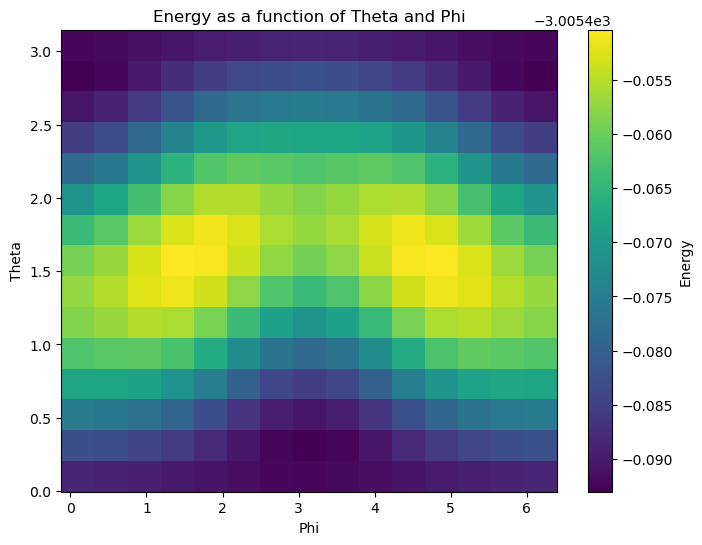

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you already have thetas and phis arrays as well as the lambda_vecs.
# thetas = np.linspace(0.1, 2*np.pi - 0.1,15)
# phis = np.linspace(0.1, 2*np.pi - 0.1,15)
# thetav, vphi = np.meshgrid(thetas, phis, indexing='xy')


# Calculate energy for each lambda_vec
energies = np.array(p_energies_for_lambda_vecs)

# Reshape energies to fit the grid dimensions (15x15)
energies = energies.reshape(thetav.shape).T

# Plot energies as a function of theta and phi using a 2D color plot
plt.figure(figsize=(8, 6))
plt.pcolormesh( vphi,thetav, energies, shading='auto', cmap='viridis')
plt.colorbar(label='Energy')  # Add a color bar to represent the energy values
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Energy as a function of Theta and Phi')
plt.show()


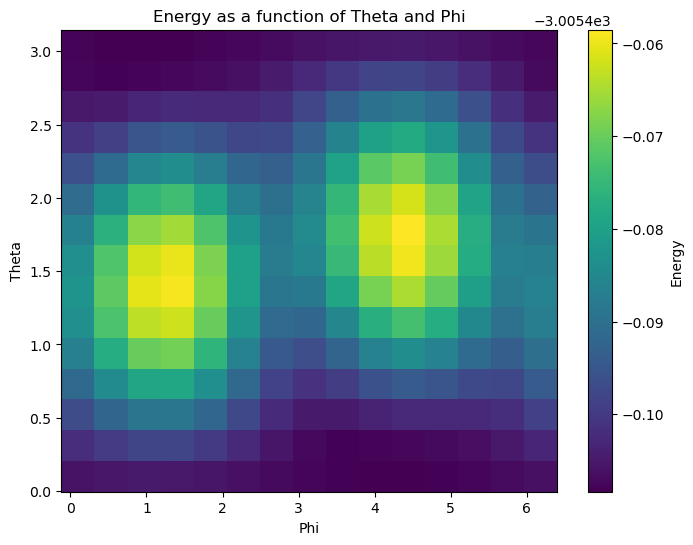

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you already have thetas and phis arrays as well as the lambda_vecs.
# thetas = np.linspace(0.1, 2*np.pi - 0.1,15)
# phis = np.linspace(0.1, 2*np.pi - 0.1,15)
# thetav, vphi = np.meshgrid(thetas, phis, indexing='xy')


# Calculate energy for each lambda_vec
energies = np.array(m_energies_for_lambda_vecs)

# Reshape energies to fit the grid dimensions (15x15)
energies = energies.reshape(thetav.shape).T

# Plot energies as a function of theta and phi using a 2D color plot
plt.figure(figsize=(8, 6))
plt.pcolormesh( vphi,thetav, energies, shading='auto', cmap='viridis')
plt.colorbar(label='Energy')  # Add a color bar to represent the energy values
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Energy as a function of Theta and Phi')
plt.show()

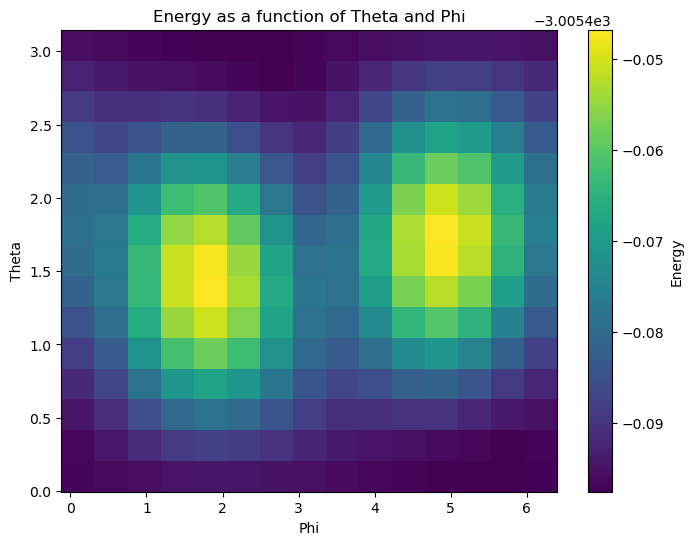

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you already have thetas and phis arrays as well as the lambda_vecs.
# thetas = np.linspace(0.1, 2*np.pi - 0.1,15)
# phis = np.linspace(0.1, 2*np.pi - 0.1,15)
# thetav, vphi = np.meshgrid(thetas, phis, indexing='xy')


# Calculate energy for each lambda_vec
energies = np.array(o_energies_for_lambda_vecs)

# Reshape energies to fit the grid dimensions (15x15)
energies = energies.reshape(thetav.shape).T

# Plot energies as a function of theta and phi using a 2D color plot
plt.figure(figsize=(8, 6))
plt.pcolormesh( vphi,thetav, energies, shading='auto', cmap='viridis')
plt.colorbar(label='Energy')  # Add a color bar to represent the energy values
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Energy as a function of Theta and Phi')
plt.show()

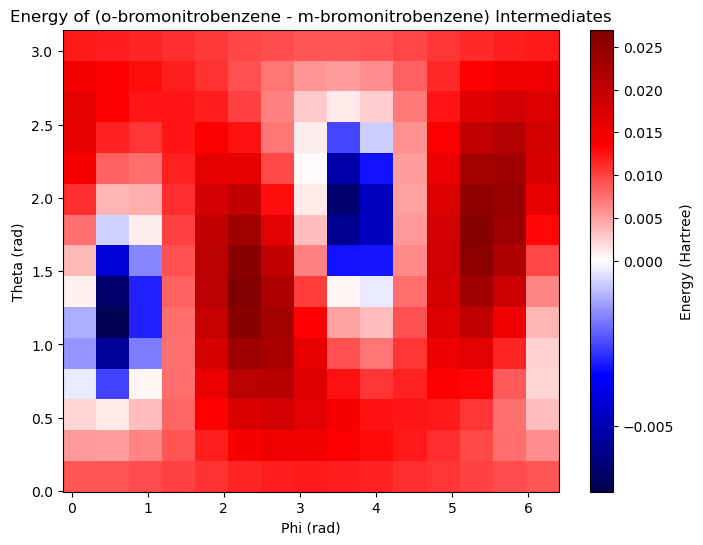

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

cmap = plt.get_cmap('seismic')
vmin = -0.007
vmax = 0.027
vcenter = 0

norm = TwoSlopeNorm(vmin = vmin, vcenter=vcenter, vmax= vmax)

# Assume you already have thetas and phis arrays as well as the lambda_vecs.
# thetas = np.linspace(0.1, 2*np.pi - 0.1,15)
# phis = np.linspace(0.1, 2*np.pi - 0.1,15)
# thetav, vphi = np.meshgrid(thetas, phis, indexing='xy')


# Calculate energy for each lambda_vec
energies_o = np.array(o_energies_for_lambda_vecs)
energies_m = np.array(m_energies_for_lambda_vecs)


# Reshape energies to fit the grid dimensions (15x15)
energies = energies_o.reshape(thetav.shape).T - energies_m.reshape(thetav.shape).T

# Plot energies as a function of theta and phi using a 2D color plot
plt.figure(figsize=(8, 6))
plt.pcolormesh( vphi, thetav ,energies, shading='auto', cmap=cmap, norm = norm)
plt.colorbar(label='Energy (Hartree)')  # Add a color bar to represent the energy values
plt.xlabel('Phi (rad)')
plt.ylabel('Theta (rad)')
plt.title('Energy of (o-bromonitrobenzene - m-bromonitrobenzene) Intermediates')
plt.show()

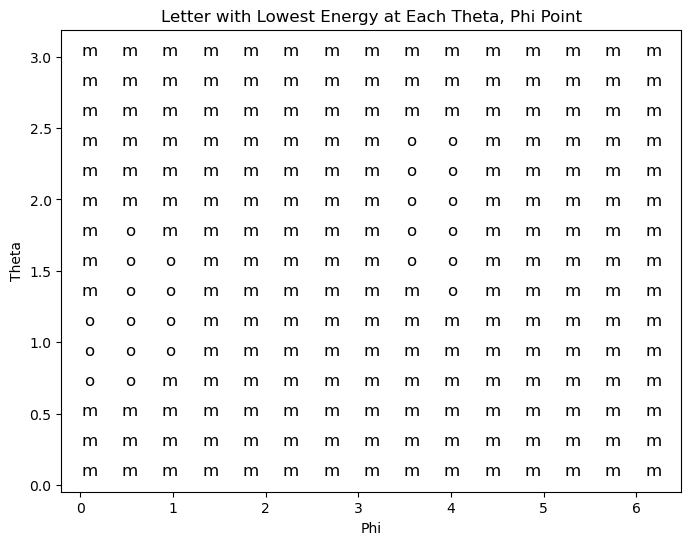

In [28]:
import numpy as np
import matplotlib.pyplot as plt


# Mock energy lists corresponding to letters o, m, p (replace these with actual energies)
energy_o = np.array(o_energies_for_lambda_vecs).reshape(thetav.shape).T  # Replace with actual energy calculations for "o"
energy_m = np.array(m_energies_for_lambda_vecs).reshape(thetav.shape).T  # Replace with actual energy calculations for "m"
energy_p = np.array(p_energies_for_lambda_vecs).reshape(thetav.shape).T  # Replace with actual energy calculations for "p"

# Create an array of letters corresponding to the lowest energy at each point
letters = np.full(thetav.shape, '', dtype=str)

# Loop through each point and assign the letter with the lowest energy
for i in range(thetav.shape[0]):
    for j in range(thetav.shape[1]):
        energies = [energy_o[i, j], energy_m[i, j], energy_p[i, j]]
        min_energy = min(energies)
        if min_energy == energy_o[i, j]:
            letters[i, j] = 'o'
        elif min_energy == energy_m[i, j]:
            letters[i, j] = 'm'
        else:
            letters[i, j] = 'p'

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(vphi, thetav, color='white', marker='o')  # Plot grid points for reference

# Overlay letters on the plot
for i in range(thetav.shape[0]):
    for j in range(thetav.shape[1]):
        plt.text(vphi[i, j], thetav[i, j], letters[i, j], color='black', fontsize=12,
                 ha='center', va='center')

plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Letter with Lowest Energy at Each Theta, Phi Point')
plt.show()


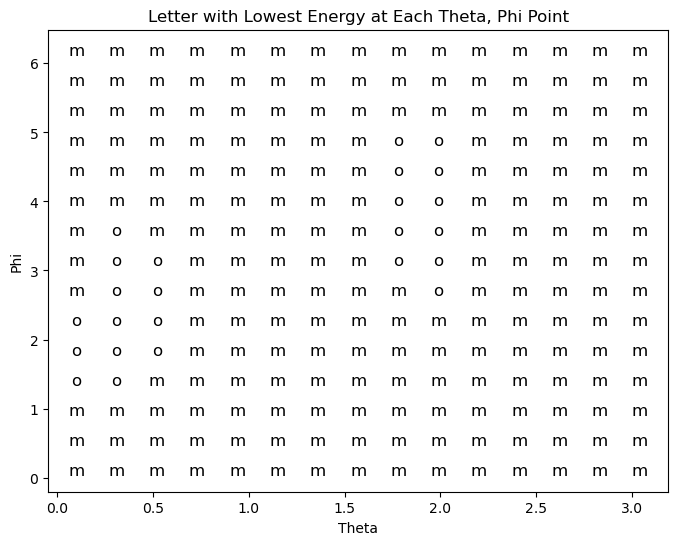

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Mock energy lists corresponding to letters o, m, p (replace these with actual energies)
energy_o = np.array(o_energies_for_lambda_vecs).reshape(thetav.shape)  # Replace with actual energy calculations for "o"
energy_m = np.array(m_energies_for_lambda_vecs).reshape(thetav.shape)  # Replace with actual energy calculations for "m"

# Create an array of letters corresponding to the lowest energy at each point
letters = np.full(thetav.shape, '', dtype=str)

# Loop through each point and assign the letter with the lowest energy
for i in range(thetav.shape[0]):
    for j in range(thetav.shape[1]):
        energies = [energy_o[i, j], energy_m[i, j]]
        min_energy = min(energies)
        if min_energy == energy_o[i, j]:
            letters[i, j] = 'o'
        elif min_energy == energy_m[i, j]:
            letters[i, j] = 'm'


# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(thetav, vphi, color='white', marker='o')  # Plot grid points for reference

# Overlay letters on the plot
for i in range(thetav.shape[0]):
    for j in range(thetav.shape[1]):
        plt.text(thetav[i, j], vphi[i, j], letters[i, j], color='black', fontsize=12,
                 ha='center', va='center')

plt.xlabel('Theta')
plt.ylabel('Phi')
plt.title('Letter with Lowest Energy at Each Theta, Phi Point')
plt.show()


In [18]:
np.save('ortho_energies_for_lambda_vecs.npy',np.array( o_energies_for_lambda_vecs))
np.save('meta_energies_for_lambda_vecs.npy',np.array( m_energies_for_lambda_vecs))
np.save('para_energies_for_lambda_vecs.npy',np.array( p_energies_for_lambda_vecs))
np.save('lambda_vecs.npy',np.array( lambda_vecs))